# Pearson correlation coefficient
Analysis on market_data1

In [26]:
import pandas as pd
import math
import matplotlib

In [21]:
# Read market data 1
market_data1 = pd.read_csv("market_data1.csv")

# Split dataframe into seperate instruments
instrument0 = market_data1[market_data1['Instrument'] == 0]
instrument1 = market_data1[market_data1['Instrument'] == 1]

max_time = market_data1.max(numeric_only=True)
max_time = max_time[0]
max_time = math.ceil(max_time)    

In [33]:
# Calculate midpoint prices for instrument 0 at 1 second intervals
midpoint_prices = []

for i in range(max_time):
    # Filter data to be upto a time interval
    up_to_time = instrument0[instrument0['Time'] < i + 1]

    # Drop orders with same OrderID hence removing all cancelled orders
    up_to_time = up_to_time.drop_duplicates(subset='OrderId', keep=False)

    # Filter data to be between single time interval a <= datadrame < b
    time_interval = up_to_time[up_to_time['Time'] >= i]

    # Split dataset into buy and sell side
    time_interval_bid = time_interval[time_interval['Side'] == 'A']
    time_interval_ask = time_interval[time_interval['Side'] == 'B']

    time_interval_bid.max()[6]

    # Calculate best bid price
    best_bid_price = time_interval_bid.max()[6]

    # Calculate best ask price
    best_ask_price = time_interval_ask.min()[6]

    # Calculate midpoint price
    midpoint_price = (best_bid_price + best_ask_price) / 2
    midpoint_prices.append(midpoint_price)

times = range(max_time)
data = {'Time': times, 'Midpoint_price': midpoint_prices}
instrument0_midpoint_prices = pd.DataFrame.from_dict(data)

     Time  Midpoint_price
0       0          1522.0
1       1          1470.5
2       2          1469.5
3       3          1467.5
4       4          1468.0
..    ...             ...
895   895          1466.0
896   896          1515.5
897   897          1468.5
898   898          1467.5
899   899          1516.0

[900 rows x 2 columns]


<Axes: title={'center': 'Future midpoint price'}, xlabel='Time', ylabel='Midpoint Price'>

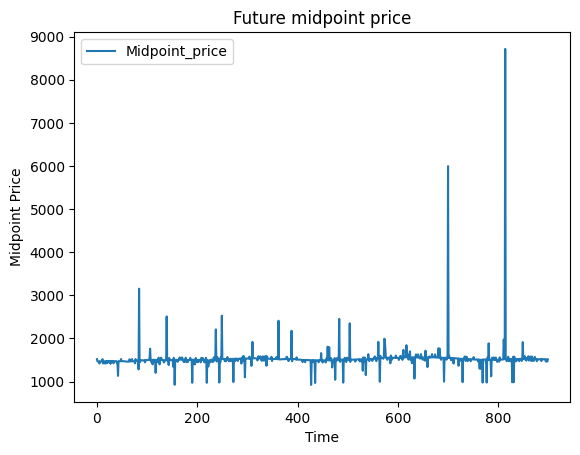

In [50]:
print(instrument0_midpoint_prices)
instrument0_midpoint_prices.plot(x='Time', y='Midpoint_price', ylabel="Midpoint Price", title="Future midpoint price")

In [47]:
# Calculate midpoint prices for instrument 1 at one second intervals
midpoint_prices = []

for i in range(max_time):
    # Filter data to be upto a time interval
    up_to_time = instrument1[instrument1['Time'] < i + 1]

    # Drop orders with same OrderID hence removing all cancelled orders
    up_to_time = up_to_time.drop_duplicates(subset='OrderId', keep=False)

    # Filter data to be between single time interval a <= datadrame < b
    time_interval = up_to_time[up_to_time['Time'] >= i]

    # Split dataset into buy and sell side
    time_interval_bid = time_interval[time_interval['Side'] == 'A']
    time_interval_ask = time_interval[time_interval['Side'] == 'B']

    time_interval_bid.max()[6]

    # Calculate best bid price
    best_bid_price = time_interval_bid.max()[6]

    # Calculate best ask price
    best_ask_price = time_interval_ask.min()[6]

    # Calculate midpoint price
    midpoint_price = (best_bid_price + best_ask_price) / 2
    midpoint_prices.append(midpoint_price)

times = range(max_time)
data = {'Time': times, 'Midpoint_price': midpoint_prices}
instrument1_midpoint_prices = pd.DataFrame.from_dict(data)

     Time  Midpoint_price
0       0          1470.0
1       1          1458.5
2       2          1460.5
3       3          1475.5
4       4          1468.0
..    ...             ...
895   895          1510.0
896   896          1517.0
897   897          1516.0
898   898          1519.0
899   899          1514.0

[900 rows x 2 columns]


<Axes: title={'center': 'ETF midpoint price'}, xlabel='Time', ylabel='Midpoint Price'>

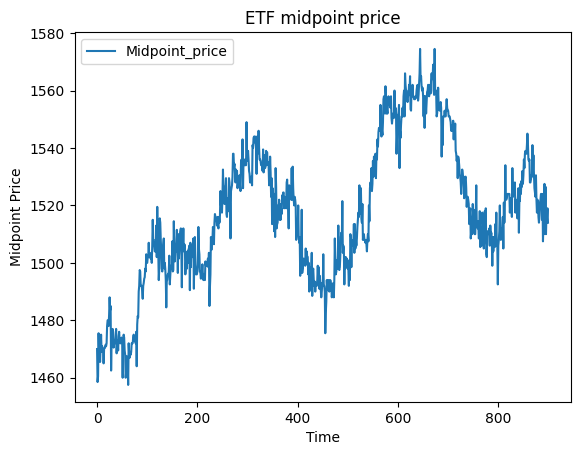

In [51]:
print(instrument1_midpoint_prices)
instrument1_midpoint_prices.plot(x='Time', y='Midpoint_price', ylabel="Midpoint Price", title="ETF midpoint price")

# Moving Averages

We want to look at the moving averages of both stocks and have a breakdown at what points will it be interesting to buy and sell